<a href="https://colab.research.google.com/github/nicholasl33/Micro-Cred-2022/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

#loading data

In [ ]:
train = pd.read_csv( 'https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/titanic_train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


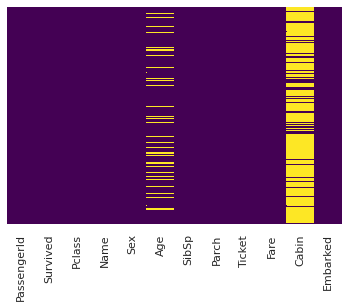

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# As we can see roughly 20% of the age data is missing. Therefore, the proportiong of Age missing is likley small enough for reasonable replacment with some form of inputation. If we look at the Cabin column, we can see that we are missing too much of data to do anything useful at this basic level...

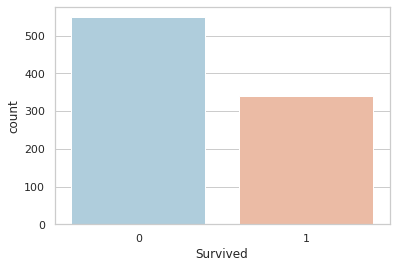

In [ ]:
# bar plot showing the amount of survivors (1) and non survivors (0)
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

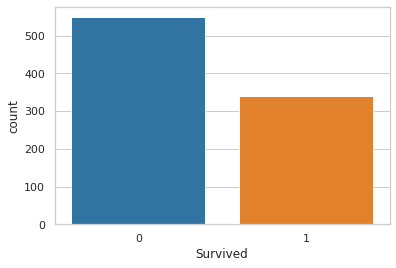

In [ ]:
# editing the style of the bar plot
sns.countplot(x='Survived', data=train, palette="tab10")

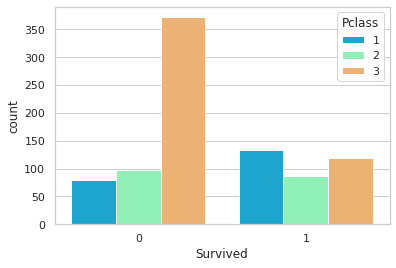

In [ ]:
# another variable added into survival, pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=train, palette='rainbow')

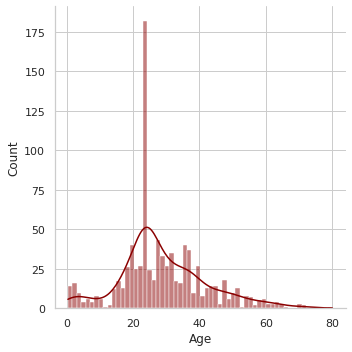

In [ ]:
# shows the distribution of ages on the titanic 
sns.displot(train['Age'].dropna(), kde=True, color='darkred', bins=60)

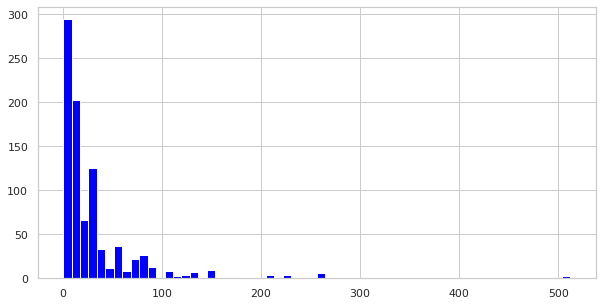

In [ ]:
#histogram of fares 
train['Fare'].hist(color='blue', bins=60, figsize=(10,5))

In [ ]:
cf.go_offline()

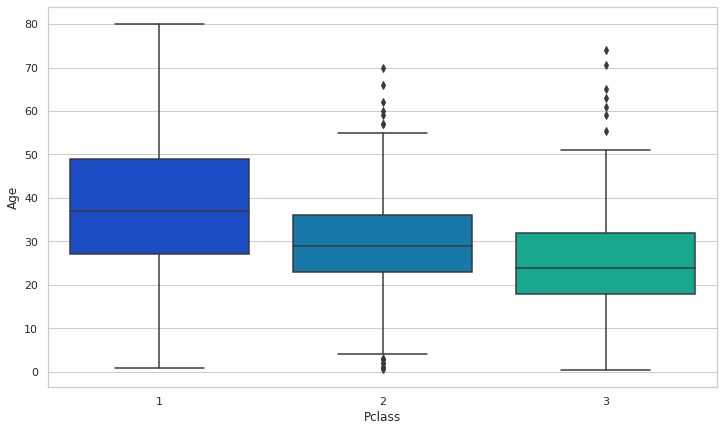

In [ ]:
# box plot that shows the max min avg of the ages within the 3 pclasses
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

# Since we can determine that people in higher classes tend to be older we can then use these average age values and input according to Pclass for age.

In [ ]:
def inpute_age(cols):
  #defining a function to remove null values in age within the 3 pclass and replacing it with the avg age of each pclass
  Age = cols[0]
  
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(inpute_age, axis=1)

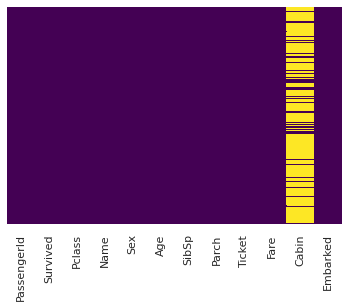

In [ ]:
# heatmap of the function above. now age has no null values 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# choosing to drop the column Cabin becuase it has bunch of values that aren't useful to us
train.drop('Cabin', axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# dropping the rows missing values within columns
train.dropna(inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Given the state of our dataset, we might need to convert categorical features to dummy variables using Pandas. If we dont, then our ML model will not be able to directly take in those features as inputs

In [ ]:
# Convert categorical variable into binary 
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [ ]:
# Convert categorical variable into binary 
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
# dropping columns plus the columns that we have made new data for 
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
# adding in the new variables made in cell 29 and 30 into the data frame
train = pd.concat([train, sex, embark], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Split the Data

In [ ]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

In [ ]:
# testing set = without the survived column, training set is the survived column testing for 30% 
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=101)

#creating and training the model 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# creating a variable for the training algorithm
logmodel = LogisticRegression()

In [ ]:
# training the x and y 
# X_train - This includes your all independent variables,these will be used to train the model
# y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your 
# independent variables, we need to specify our dependent variable while training/fitting the model.
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# testing the model

In [ ]:
# creating a variable for the predicted y test value
prediction = logmodel.predict(x_test)

#evaluating the model

In [ ]:
# Build a text report showing the main classification metrics.
from sklearn.metrics import classification_report

In [ ]:
# prints the testing restuls of y test, shows the accuracy of our algorithm
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [ ]:
# Return the mean accuracy on the given test data and labels.
print(logmodel.score(x_test,y_test))
# variable of the x test predictions
pp = logmodel.predict(x_test)
# adds up all the valeus that doesn't equal to 0 for the number of people who survived 
print("Survived", sum(pp!=0))
# adds up all the valeus that does equal to 0 for the number of people who didnt survived
print("NOT Survived", sum(pp==0))

0.8014981273408239
Survived 79
NOT Survived 188
